In [106]:
%load_ext autoreload
%autoreload 2

# Define autoreload so that we don't have to reset the kernel every time after changing the files

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
# Define the system paths
import sys
from pathlib import Path

project_root = Path.cwd().resolve().parents[3] # Gets the GitHub repo folder
print(project_root)
sys.path.append(str(project_root))

# Import modules

import pandas as pd
import matplotlib.pyplot as plt

C:\SenkDosya\Projects\FINCH-Science_SyntheticData


In [108]:
# Import code

from defs.diffusion.helper.noising.noising import *

In [109]:
# Import data

df = pd.read_csv(r'C:\SenkDosya\UTAT\Data\General_Data\simpler_data_rwc.csv')

data = df.iloc[:, 7:].to_numpy(dtype=np.float64)

print(data)


[[0.05945142 0.06440255 0.07002581 ... 0.20288342 0.08395094 0.02406419]
 [0.05861448 0.06322138 0.06855085 ... 0.06126626 0.10420719 0.03176397]
 [0.04946129 0.0532802  0.05762918 ... 0.22723868 0.03629987 0.01058028]
 ...
 [0.02633246 0.02696881 0.02848575 ... 0.08798267 0.19825926 0.18957973]
 [0.02626704 0.02579437 0.02756352 ... 0.0990945  0.11365661 0.17497927]
 [0.0250598  0.02427512 0.02545164 ... 0.0735709  0.11222987 0.22417896]]


In [110]:
Constant = ConstantSchedule(1000, 0.9999999)

trial_spectrum = data[0,]

t=10

x_t = Constant.add_noise(trial_spectrum, t=t)

print(x_t)

# Everything works

[0.06038279 0.06377305 0.07012839 0.07675145 0.08185001 0.08640985
 0.09163157 0.09499271 0.10287377 0.10656671 0.11325355 0.11838565
 0.12507834 0.13261873 0.13713712 0.14587578 0.15067255 0.15567683
 0.16253727 0.16655775 0.17003313 0.17390653 0.17972425 0.18470522
 0.18926551 0.19128204 0.19744681 0.20287459 0.20758227 0.21381116
 0.22454782 0.23442507 0.2424542  0.25119114 0.25996064 0.26537405
 0.27165563 0.27386146 0.27909651 0.28472996 0.28796592 0.29231238
 0.29668115 0.29940451 0.30359713 0.30908242 0.3126075  0.31689308
 0.31636357 0.32188827 0.32299501 0.32522984 0.32827409 0.3263235
 0.329601   0.33148455 0.3350213  0.34017895 0.34368164 0.34687539
 0.35199214 0.35731671 0.35858689 0.36314575 0.3662892  0.37107905
 0.37223723 0.37403069 0.37847719 0.38031005 0.38097556 0.38245858
 0.37955778 0.38066565 0.3805017  0.38449313 0.38847296 0.39204186
 0.39691202 0.40002562 0.39953472 0.40326609 0.40554434 0.41120628
 0.41353727 0.41782272 0.42096413 0.4214587  0.4259159  0.42779

In [111]:
Linear = LinearSchedule(1000, 0.999, 0.98)

trial_spectrum = data[0,]

t = 10

x_t = Linear.add_noise(trial_spectrum, t=t)

print(x_t)

# Everything works

[-0.06824349  0.14228595  0.1383164  -0.08122519  0.36851663 -0.06078477
 -0.04705693  0.05424486 -0.00422792  0.10662203  0.07133238  0.08052094
  0.18818553  0.03273534  0.18102941  0.18546414 -0.22078719  0.11046907
  0.2022728   0.17969186  0.19229963  0.14878806  0.16887585  0.27250914
  0.2206484   0.17281916  0.25051223  0.21875898  0.04997834  0.06887384
  0.34987249  0.16763031  0.14383021  0.21059703  0.53914157  0.23399454
  0.42854633  0.32194871 -0.0060317   0.43901777  0.21245735  0.30817999
  0.11989581  0.22523111  0.17890952  0.47639554  0.30031472  0.26946658
  0.28058418  0.22688825  0.36429592  0.17846685  0.17016069  0.3282626
  0.13115764  0.32762332  0.22746888  0.39484989  0.45723686  0.40877952
  0.4136303   0.30255607  0.44030263  0.36760488  0.44108526  0.41278256
  0.38766846  0.43692063  0.2939517   0.19582698  0.12477681  0.5341076
  0.50440185  0.29000317  0.30304366  0.4195565   0.35897556  0.39982829
  0.38981368  0.16785359  0.22335027  0.15330445  0.3

In [112]:
Cosine = CosSchedule(1000, 0.0008, 2)

trial_spectrum = torch.tensor(data[0,])

t=10
time_tens = torch.tensor([t])

x_t = Cosine.add_noise(trial_spectrum, t=time_tens)

# Everything works

<string>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


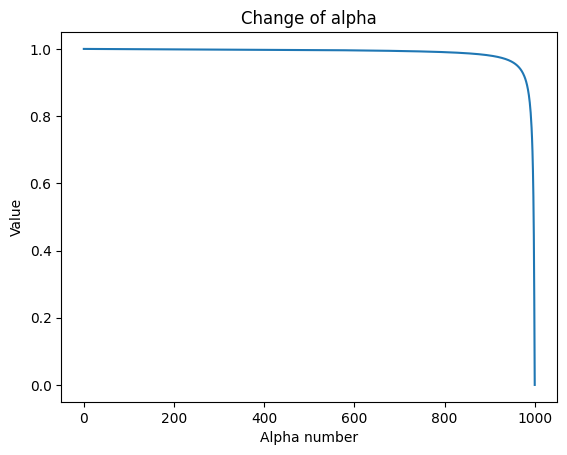

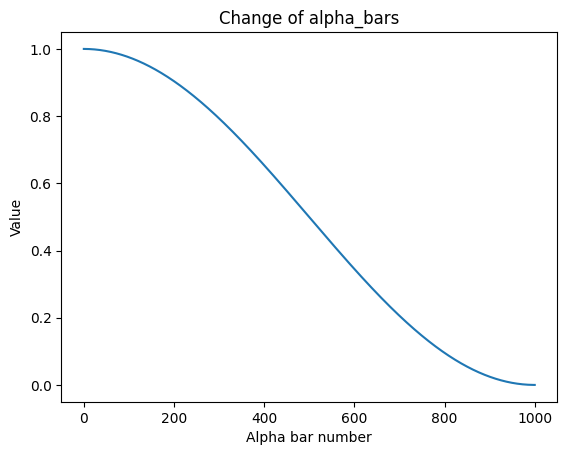

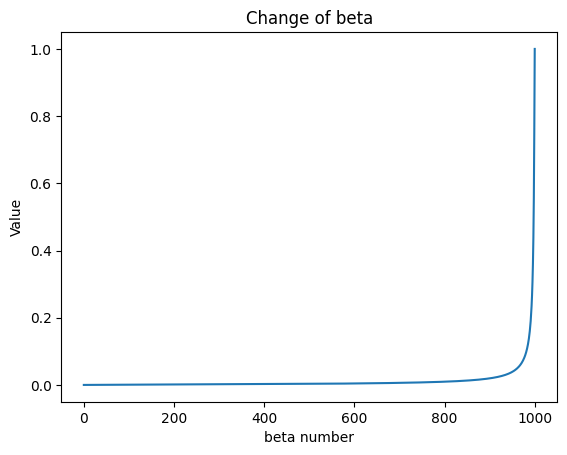

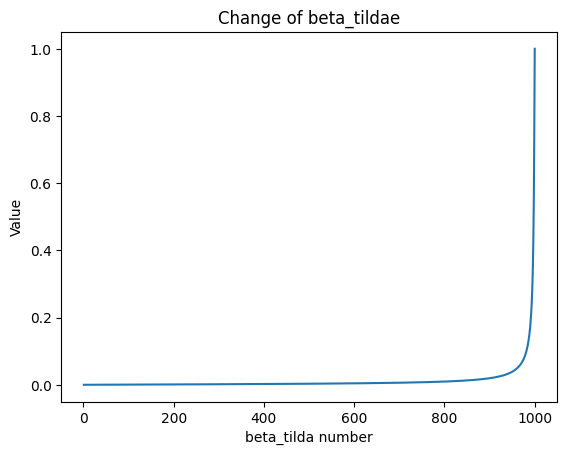

In [ ]:
# Will try plotting the alpha_bars

T=1000

alpha_bars = Cosine.alpha_bars

alpha = 31*torch.ones_like(alpha_bars)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    alpha[i] = Cosine.alpha_t(time_tens)

beta = 31*torch.ones_like(alpha_bars)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    beta[i] = Cosine.beta_t(time_tens)

beta_tilda = 31*torch.ones_like(alpha_bars)
for i in range(0, T+1):
    time_tens = torch.tensor([i])
    beta_tilda[i] = Cosine.beta_tilda_t(time_tens)

ranges=np.arange(0,1001, 1)

shifted_alpha_bars = torch.roll(alpha_bars, shifts=1)

plt.plot(ranges, alpha)
plt.xlabel("Alpha number")
plt.ylabel("Value")
plt.title("Change of alpha")
plt.show()

plt.plot(ranges, alpha_bars)
plt.xlabel("Alpha bar number")
plt.ylabel("Value")
plt.title("Change of alpha_bars")
plt.show()

plt.plot(ranges, beta)
plt.xlabel("beta number")
plt.ylabel("Value")
plt.title("Change of beta")
plt.show()

plt.plot(ranges, beta_tilda)
plt.xlabel("beta_tilda number")
plt.ylabel("Value")
plt.title("Change of beta_tildae")
plt.show()